<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Normalization_and_Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white", color_codes=True, rc={'figure.figsize':(12,8)})

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
most_streamed_songs = pd.read_csv("/content/drive/MyDrive/Government Datasets/Most Streamed Spotify Songs 2024.csv", encoding="latin-1")

In [58]:
most_streamed_songs.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [59]:
most_streamed_songs.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [60]:
most_streamed_songs.drop(["TIDAL Popularity"], axis=1, inplace=True)

In [61]:
most_streamed_songs['Spotify Streams'] = most_streamed_songs['Spotify Streams'].str.replace(',', '').astype(np.float64)
most_streamed_songs['Spotify Playlist Count'] = most_streamed_songs['Spotify Playlist Count'].str.replace(',', '').astype(np.float64)
most_streamed_songs['Spotify Playlist Reach'] = most_streamed_songs['Spotify Playlist Reach'].str.replace(',', '').astype(np.float64)
most_streamed_songs['YouTube Views'] = most_streamed_songs['YouTube Views'].str.replace(',', '').astype(np.float64)
most_streamed_songs['YouTube Likes'] = most_streamed_songs['YouTube Likes'].str.replace(',', '').astype(np.float64)
most_streamed_songs['TikTok Likes'] = most_streamed_songs['TikTok Likes'].str.replace(',', '').astype(np.float64)
most_streamed_songs['TikTok Posts'] = most_streamed_songs['TikTok Posts'].str.replace(',', '').astype(np.float64)
most_streamed_songs['TikTok Views'] = most_streamed_songs['TikTok Views'].str.replace(',', '').astype(np.float64)
most_streamed_songs['YouTube Playlist Reach'] = most_streamed_songs['YouTube Playlist Reach'].str.replace(',', '').astype(np.float64)
most_streamed_songs['AirPlay Spins'] = most_streamed_songs['AirPlay Spins'].str.replace(',', '').astype(np.float64)
most_streamed_songs['SiriusXM Spins'] = most_streamed_songs['SiriusXM Spins'].str.replace(',', '').astype(np.float64)
most_streamed_songs['Pandora Track Stations'] = most_streamed_songs['Pandora Track Stations'].str.replace(',', '').astype(np.float64)
most_streamed_songs['Soundcloud Streams'] = most_streamed_songs['Soundcloud Streams'].str.replace(',', '').astype(np.float64)
most_streamed_songs['Shazam Counts'] = most_streamed_songs['Shazam Counts'].str.replace(',', '').astype(np.float64)
most_streamed_songs['Pandora Streams'] = most_streamed_songs['Pandora Streams'].str.replace(',', '').astype(np.float64)
most_streamed_songs['Deezer Playlist Reach'] = most_streamed_songs['Deezer Playlist Reach'].str.replace(',', '').astype(np.float64)

In [62]:
most_streamed_songs.shape

(4600, 28)

In [63]:
most_streamed_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [64]:
most_streamed_songs.describe().T

,count,mean,std,min,25%,50%,75%,max
Track Score,4600.0,4.184404e+01,3.854377e+01,19.4,23.30,29.9,4.442500e+01,7.254000e+02
Spotify Streams,4487.0,4.473873e+08,5.384439e+08,1071.0,70386298.50,239850720.0,6.283638e+08,4.281469e+09
Spotify Playlist Count,4530.0,5.939083e+04,7.113141e+04,1.0,6718.00,32312.5,8.603875e+04,5.903920e+05
Spotify Playlist Reach,4528.0,2.334682e+07,2.968717e+07,1.0,4791611.50,13259481.0,2.966069e+07,2.623434e+08
Spotify Popularity,3796.0,6.350158e+01,1.618644e+01,1.0,61.00,67.0,7.300000e+01,9.600000e+01
YouTube Views,4292.0,4.027967e+08,7.019000e+08,913.0,40730320.25,148269610.0,4.647882e+08,1.632276e+10
YouTube Likes,4285.0,2.930049e+06,4.593640e+06,25.0,409549.00,1257935.0,3.573193e+06,6.231118e+07
TikTok Posts,3427.0,9.443076e+05,2.442080e+06,1.0,38186.50,182200.0,7.948775e+05,4.290000e+07
TikTok Likes,3620.0,1.126375e+08,5.498123e+08,3.0,5814876.50,26534406.0,9.328418e+07,2.347422e+10
TikTok Views,3619.0,1.161158e+09,5.881584e+09,19.0,59027855.50,265917250.0,9.134169e+08,2.332323e+11


In [65]:
print(most_streamed_songs.isnull().sum())

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3333
Shazam Counts                  577
Explicit Track                   0
dtype: int64


In [66]:
print(most_streamed_songs.duplicated().sum())

2


In [67]:
most_streamed_songs.dropna(subset=['Artist'], inplace=True)

In [68]:
print(most_streamed_songs[most_streamed_songs["Track Score"]>200].Artist.nunique())

45


In [69]:
most_streamed_songs["Album Name"].nunique()

4000

<Axes: xlabel='Explicit Track', ylabel='Spotify Streams'>

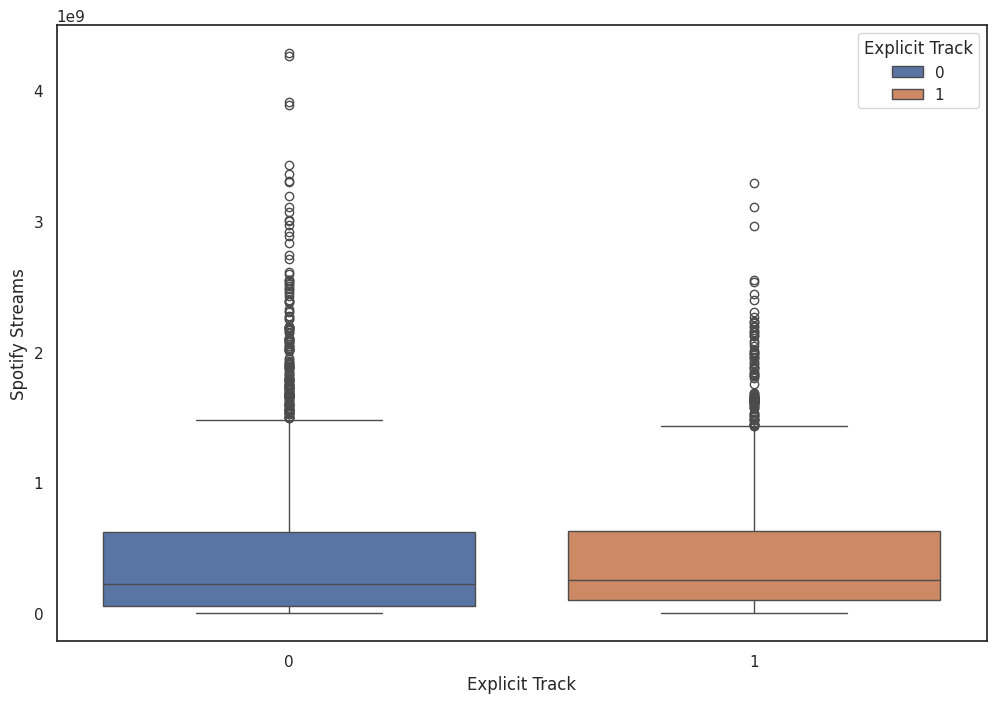

In [70]:
sns.boxplot(x="Explicit Track", y="Spotify Streams", data=most_streamed_songs, hue="Explicit Track")

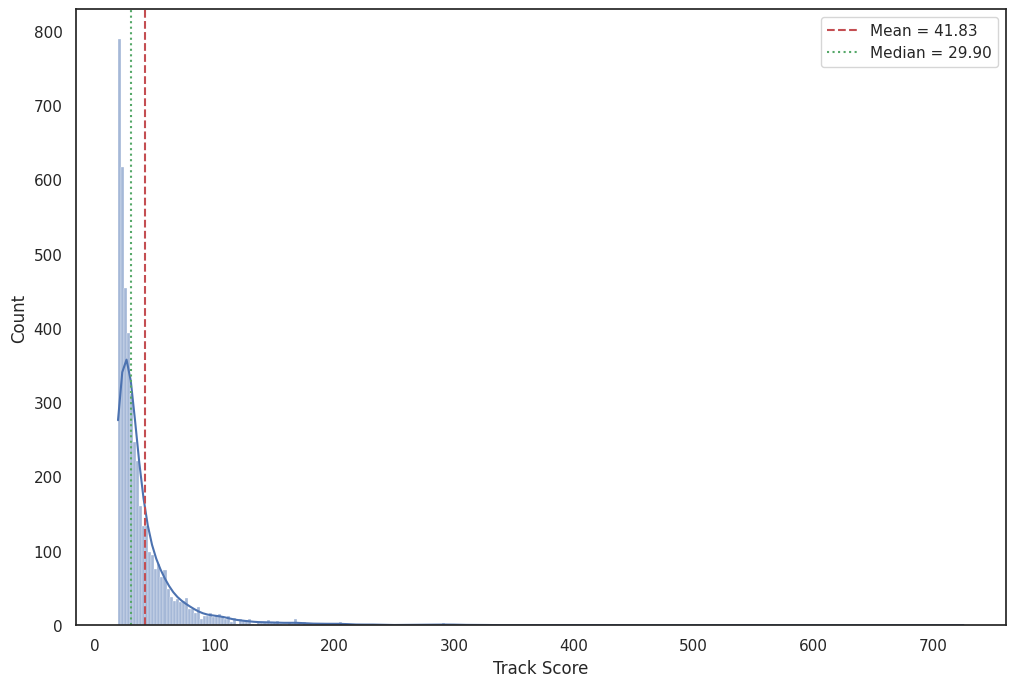

In [71]:
sns.histplot(x="Track Score", data=most_streamed_songs, kde=True)
meanTrack_Score = most_streamed_songs["Track Score"].mean()
medianTrack_Score = most_streamed_songs["Track Score"].median()
plt.axvline(meanTrack_Score, color='r', linestyle='dashed', label=f"Mean = {meanTrack_Score:.2f}")
plt.axvline(medianTrack_Score, color='g', linestyle='dotted', label=f"Median = {medianTrack_Score:.2f}")
plt.legend()
plt.show()

In [72]:
from sklearn import preprocessing

normalized_TS = preprocessing.normalize([most_streamed_songs["Track Score"]])
normalized_TS = normalized_TS.reshape(-1)
normalized_TS

array([0.18811054, 0.14156265, 0.13961775, ..., 0.0050308 , 0.0050308 ,
       0.0050308 ])

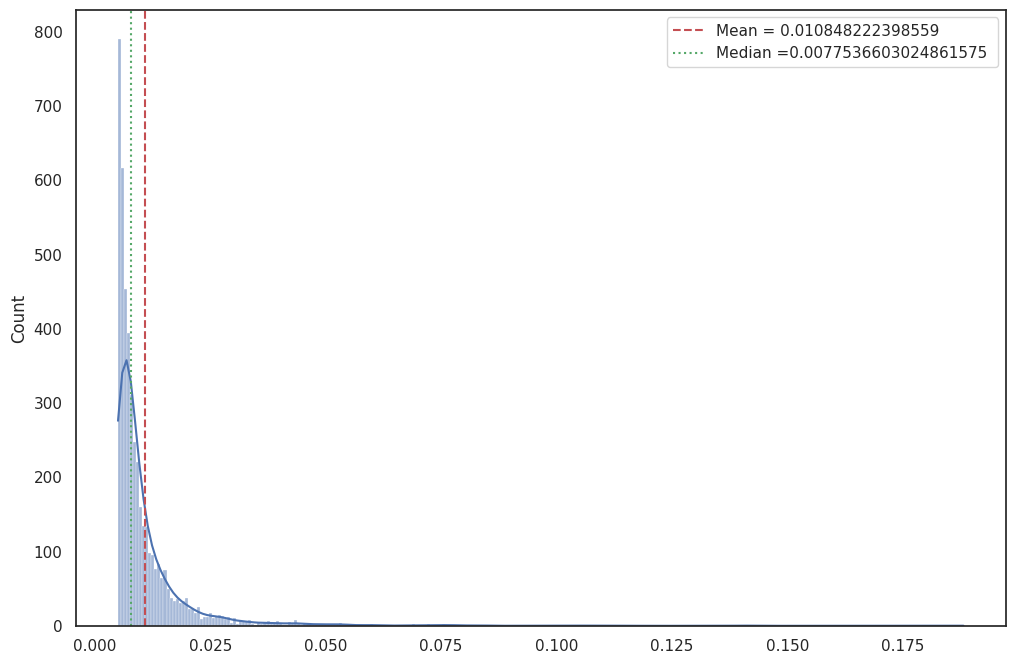

In [97]:
sns.histplot(x=normalized_TS, kde=True)
plt.axvline(normalized_TS.mean(), color='r', linestyle='dashed', label=f"Mean = {normalized_TS.mean()}")
plt.axvline(np.median(normalized_TS), color='g', linestyle='dotted', label=f"Median ={np.median(normalized_TS)} ")
plt.legend()
plt.show()

In [74]:
minTrack_Score = most_streamed_songs["Track Score"].min()
maxTrack_Score = most_streamed_songs["Track Score"].max()
print(f"Minimum Track Score: {minTrack_Score}")
print(f"Maximum Track Score: {maxTrack_Score}")
normalized_track_score = (most_streamed_songs["Track Score"] - minTrack_Score) / (maxTrack_Score - minTrack_Score)

Minimum Track Score: 19.4
Maximum Track Score: 725.4


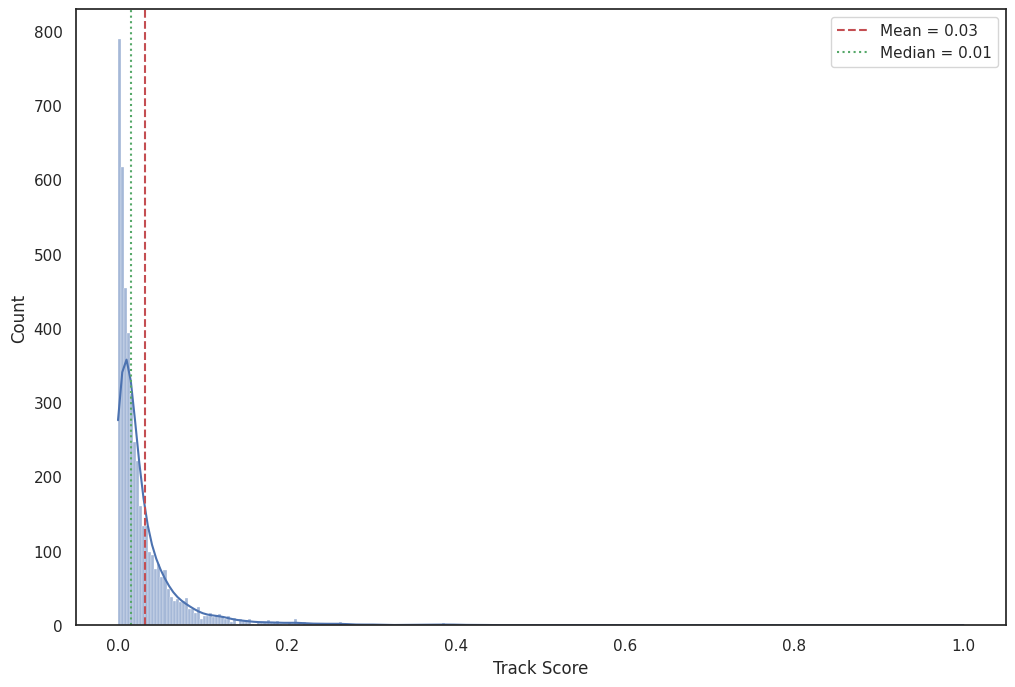

In [75]:
sns.histplot(x=normalized_track_score, kde=True)
normalized_meanTrack_Score = normalized_track_score.mean()
normalized_medianTrack_Score = normalized_track_score.median()
plt.axvline(normalized_meanTrack_Score, color='r', linestyle='dashed', label=f"Mean = {normalized_meanTrack_Score:.2f}")
plt.axvline(normalized_medianTrack_Score, color='g', linestyle='dotted', label=f"Median = {normalized_medianTrack_Score:.2f}")
plt.legend()
plt.show()

In [76]:
standardized_track_score = (most_streamed_songs["Track Score"] - most_streamed_songs["Track Score"].mean()) / most_streamed_songs["Track Score"].std()

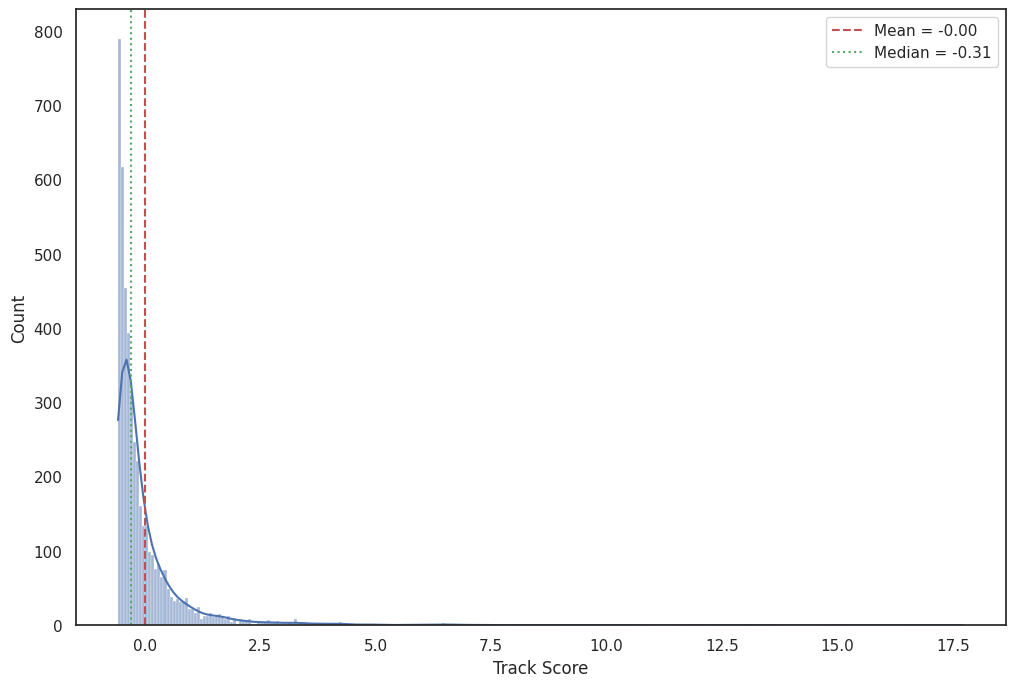

In [77]:
standardized_meanTrack_Score = standardized_track_score.mean()
standardized_medianTrack_Score = standardized_track_score.median()
sns.histplot(x=standardized_track_score, kde=True)
plt.axvline(standardized_meanTrack_Score, color='r', linestyle='dashed', label=f"Mean = {standardized_meanTrack_Score:.2f}")
plt.axvline(standardized_medianTrack_Score, color='g', linestyle='dotted', label=f"Median = {standardized_medianTrack_Score:.2f}")
plt.legend()
plt.show()

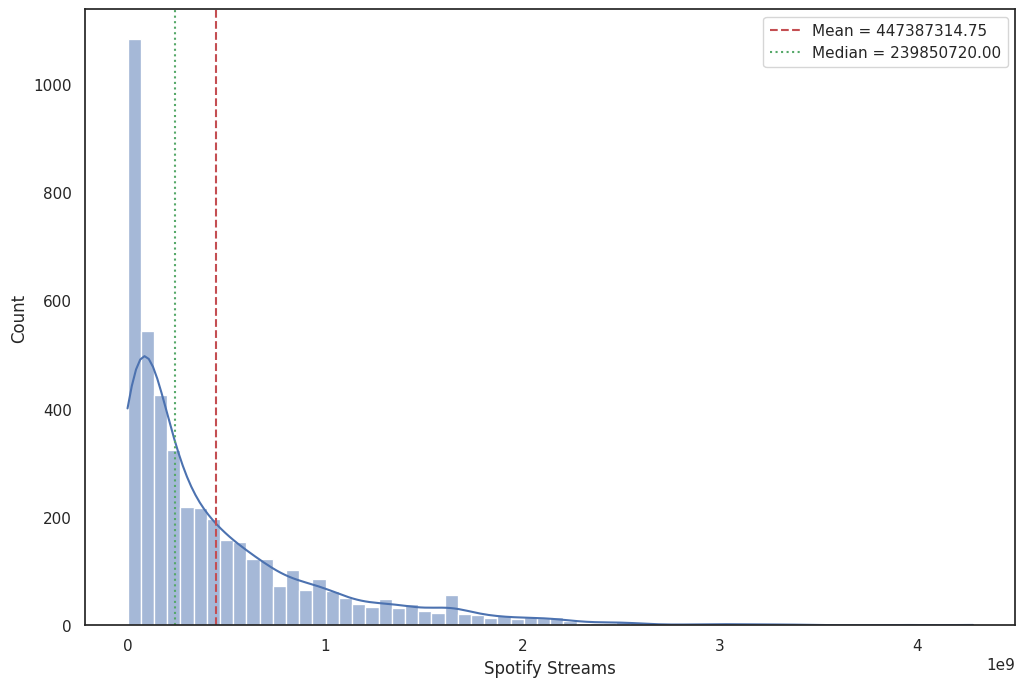

In [78]:
sns.histplot(x="Spotify Streams", data=most_streamed_songs, kde=True)
meanSpotify_Streams = most_streamed_songs["Spotify Streams"].mean()
medianSpotify_Streams = most_streamed_songs["Spotify Streams"].median()
plt.axvline(meanSpotify_Streams, color='r', linestyle='dashed', label=f"Mean = {meanSpotify_Streams:.2f}")
plt.axvline(medianSpotify_Streams, color='g', linestyle='dotted', label=f"Median = {medianSpotify_Streams:.2f}")
plt.legend()
plt.show()

In [79]:
minSpotify_Streams = most_streamed_songs["Spotify Streams"].min()
maxSpotify_Streams = most_streamed_songs["Spotify Streams"].max()
print(f"Minimum Spotify Streams: {minSpotify_Streams}")
print(f"Maximum Spotify Streams: {maxSpotify_Streams}")
normalized_Spotify_Streams = (most_streamed_songs["Spotify Streams"] - minSpotify_Streams) / (maxSpotify_Streams - minSpotify_Streams)

Minimum Spotify Streams: 1071.0
Maximum Spotify Streams: 4281468720.0


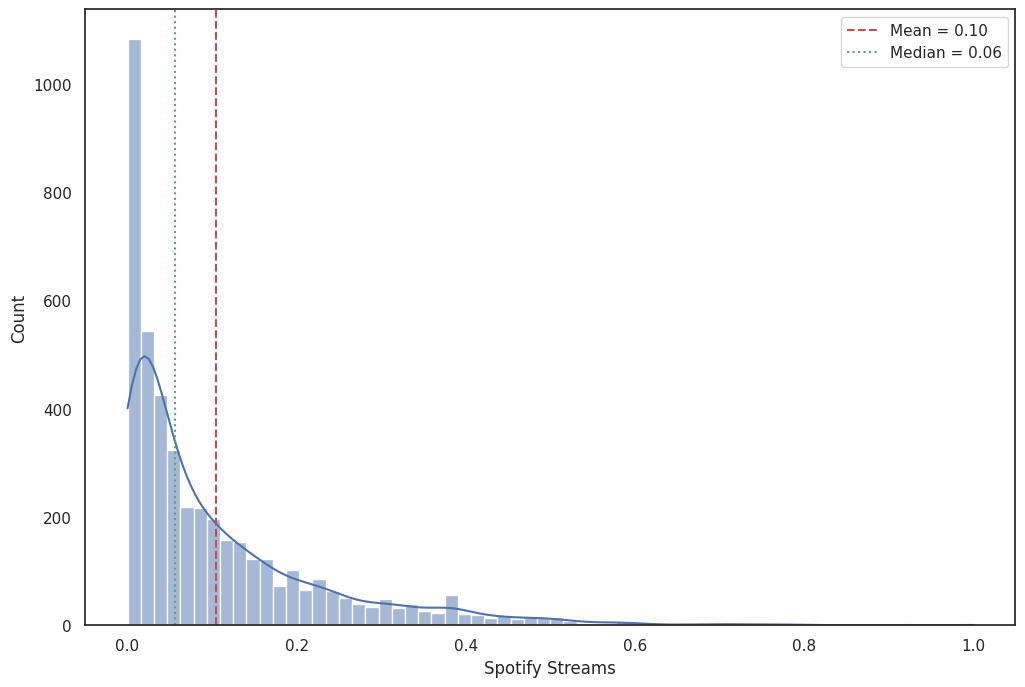

In [80]:
sns.histplot(x=normalized_Spotify_Streams, kde=True)
normalized_meanSpotify_Streams = normalized_Spotify_Streams.mean()
normalized_medianSpotify_Streams = normalized_Spotify_Streams.median()
plt.axvline(normalized_meanSpotify_Streams, color='r', linestyle='dashed', label=f"Mean = {normalized_meanSpotify_Streams:.2f}")
plt.axvline(normalized_medianSpotify_Streams, color='g', linestyle='dotted', label=f"Median = {normalized_medianSpotify_Streams:.2f}")
plt.legend()
plt.show()

In [81]:
standardized_Spotify_Streams = (most_streamed_songs["Spotify Streams"] - most_streamed_songs["Spotify Streams"].mean()) / most_streamed_songs["Spotify Streams"].std()

In [82]:
print(f"standard deviation of standardized spotify streams data: {standardized_Spotify_Streams.std():.2f}")
print(f"mean of standardized spotify stream data: {standardized_Spotify_Streams.mean():.2f}")

print(f"standard deviation of normalized spotify stream data: {normalized_Spotify_Streams.std(): .2f}")
print(f"mean of normalized spotify stream data: {normalized_Spotify_Streams.mean(): .2f}")

print(f"standard deviation of Spotify Streams data: {most_streamed_songs['Spotify Streams'].std():.2f}")
print(f"mean of Spotify Stream data: {most_streamed_songs['Spotify Streams'].mean():.2f}")

standard deviation of standardized spotify streams data: 1.00
mean of standardized spotify stream data: 0.00
standard deviation of normalized spotify stream data:  0.13
mean of normalized spotify stream data:  0.10
standard deviation of Spotify Streams data: 538443905.28
mean of Spotify Stream data: 447387314.75


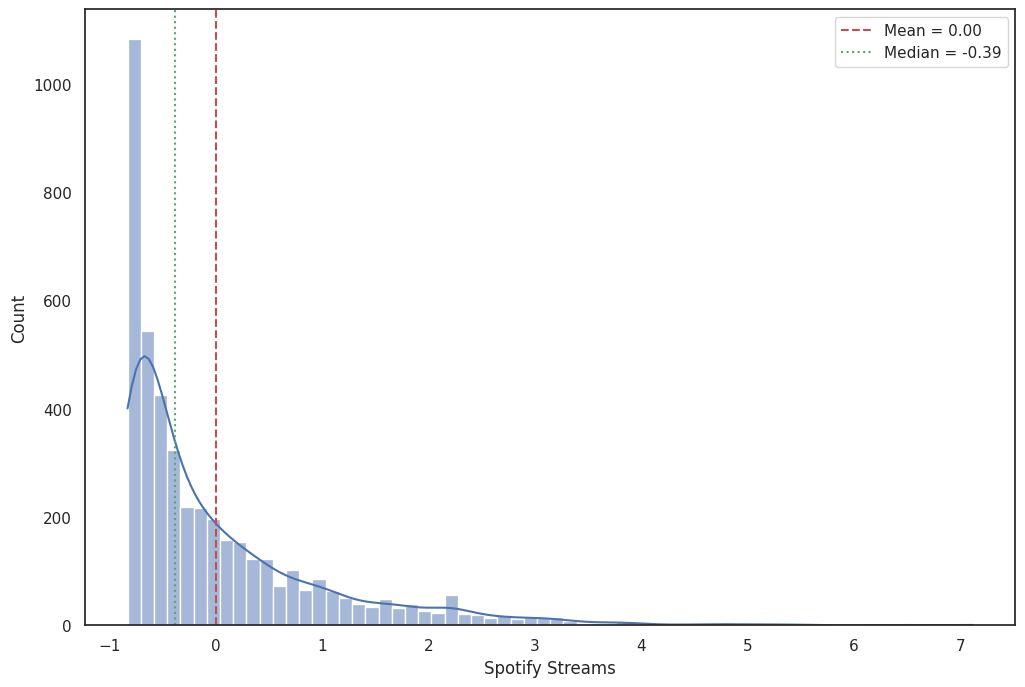

In [83]:
standardized_meanSpotify_Streams = standardized_Spotify_Streams.mean()
standardized_medianSpotify_Streams = standardized_Spotify_Streams.median()
sns.histplot(x=standardized_Spotify_Streams, kde=True)
plt.axvline(standardized_meanSpotify_Streams, color='r', linestyle='dashed', label=f"Mean = {standardized_meanSpotify_Streams:.2f}")
plt.axvline(standardized_medianSpotify_Streams, color='g', linestyle='dotted', label=f"Median = {standardized_medianSpotify_Streams:.2f}")
plt.legend()
plt.show()

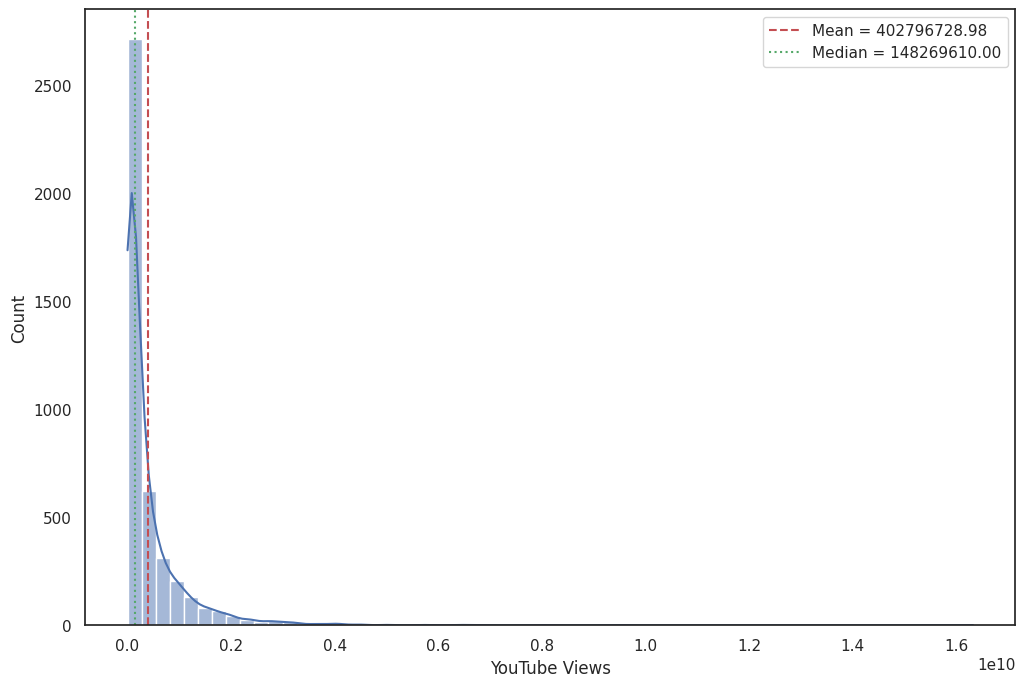

In [103]:
sns.histplot(x="YouTube Views", data=most_streamed_songs, kde=True, bins=60)
plt.axvline(most_streamed_songs["YouTube Views"].mean(), color='r', linestyle='dashed', label=f"Mean = {most_streamed_songs['YouTube Views'].mean():.2f}")
plt.axvline(most_streamed_songs["YouTube Views"].median(), color='g', linestyle='dotted', label=f"Median = {most_streamed_songs['YouTube Views'].median():.2f}")
plt.legend()
plt.show()

In [104]:
min_YouTube_Views = most_streamed_songs["YouTube Views"].min()
max_YouTube_Views = most_streamed_songs["YouTube Views"].max()
mean_YouTube_Views = most_streamed_songs["YouTube Views"].mean()
std_YouTube_Views = most_streamed_songs["YouTube Views"].std()
normalized_YouTube_Views = (most_streamed_songs["YouTube Views"] - min_YouTube_Views) / (max_YouTube_Views - min_YouTube_Views)
standardized_YouTube_Views = (most_streamed_songs["YouTube Views"] - mean_YouTube_Views) / std_YouTube_Views

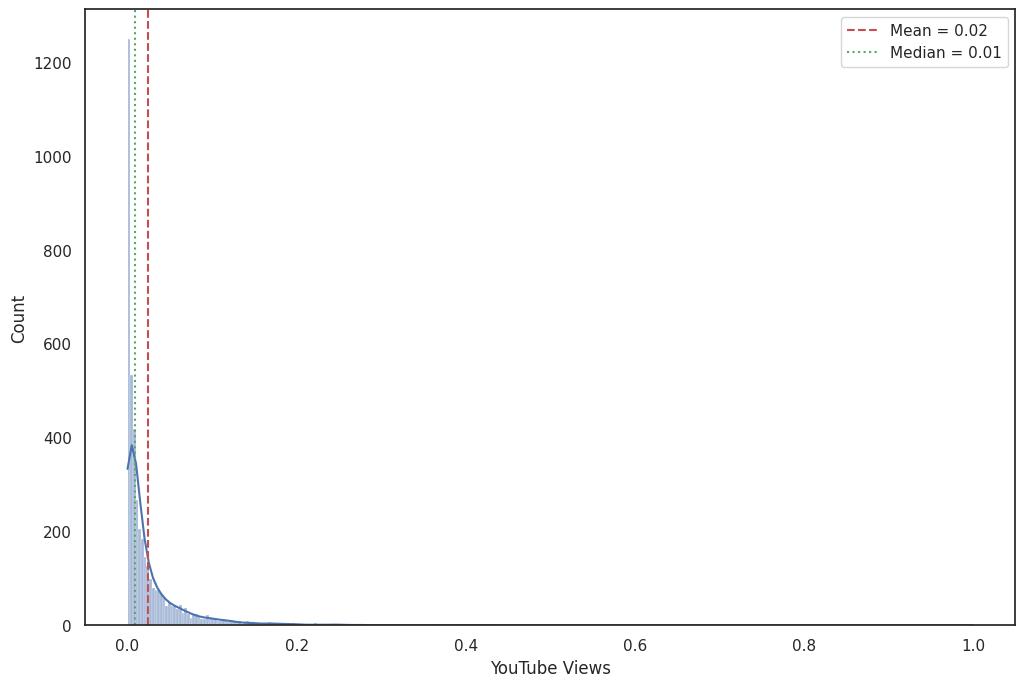

In [105]:
sns.histplot(x=normalized_YouTube_Views, kde=True)
plt.axvline(normalized_YouTube_Views.mean(), color='r', linestyle='dashed', label=f"Mean = {normalized_YouTube_Views.mean():.2f}")
plt.axvline(normalized_YouTube_Views.median(), color='g', linestyle='dotted', label=f"Median = {normalized_YouTube_Views.median():.2f}")
plt.legend()
plt.show()

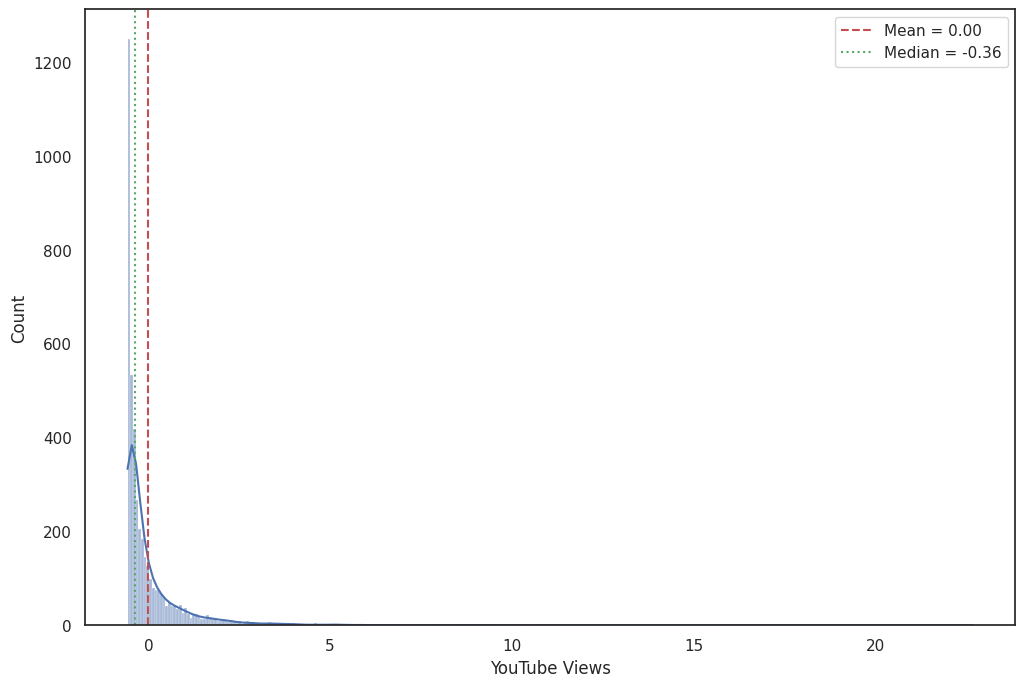

In [106]:
sns.histplot(x=standardized_YouTube_Views, kde=True)
plt.axvline(standardized_YouTube_Views.mean(), color='r', linestyle='dashed', label=f"Mean = {standardized_YouTube_Views.mean():.2f}")
plt.axvline(standardized_YouTube_Views.median(), color='g', linestyle='dotted', label=f"Median = {standardized_YouTube_Views.median():.2f}")
plt.legend()
plt.show()

In [84]:
# Checking for covariance between Spotify Streams and Track Score
Track_Score_and_Spotify_Streams_covariance = most_streamed_songs['Track Score'].cov(most_streamed_songs['Spotify Streams'])
print(f"Covariance between Track Score and Spotify Streams: {Track_Score_and_Spotify_Streams_covariance:.2f}")

Covariance between Track Score and Spotify Streams: 5212217430.97


Covariance is too high, states that they are mostly unrelated to each other. ❄

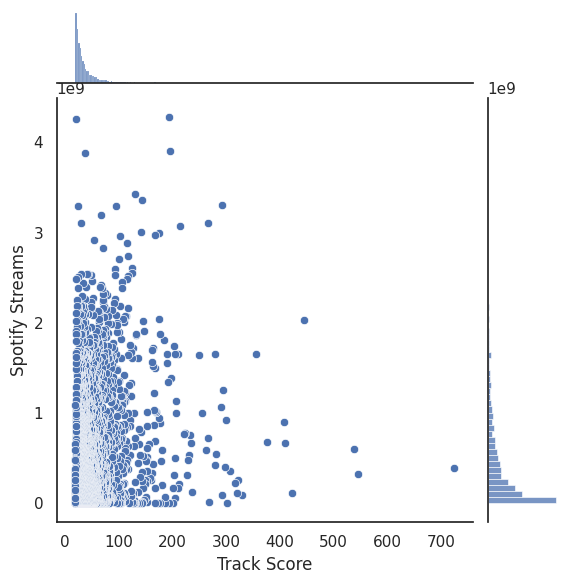

In [85]:
sns.jointplot(x="Track Score", y="Spotify Streams", data=most_streamed_songs)

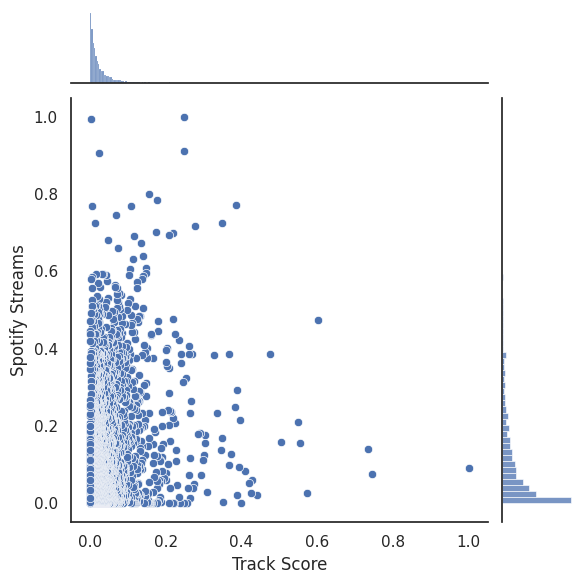

In [86]:
sns.jointplot(x=normalized_track_score, y=normalized_Spotify_Streams)

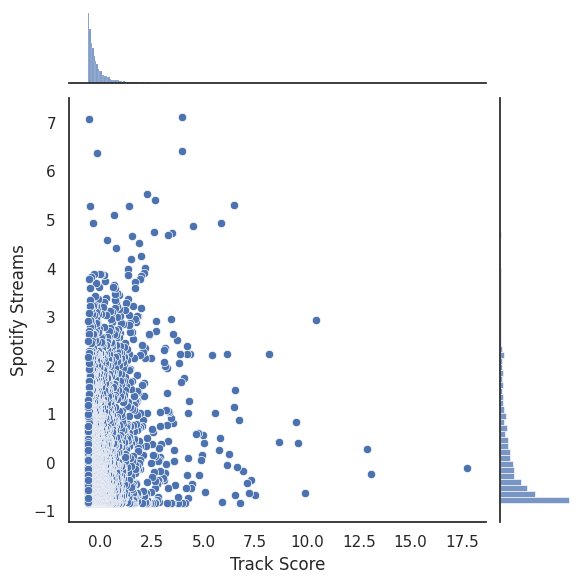

In [87]:
sns.jointplot(x=standardized_track_score, y=standardized_Spotify_Streams)

<Axes: >

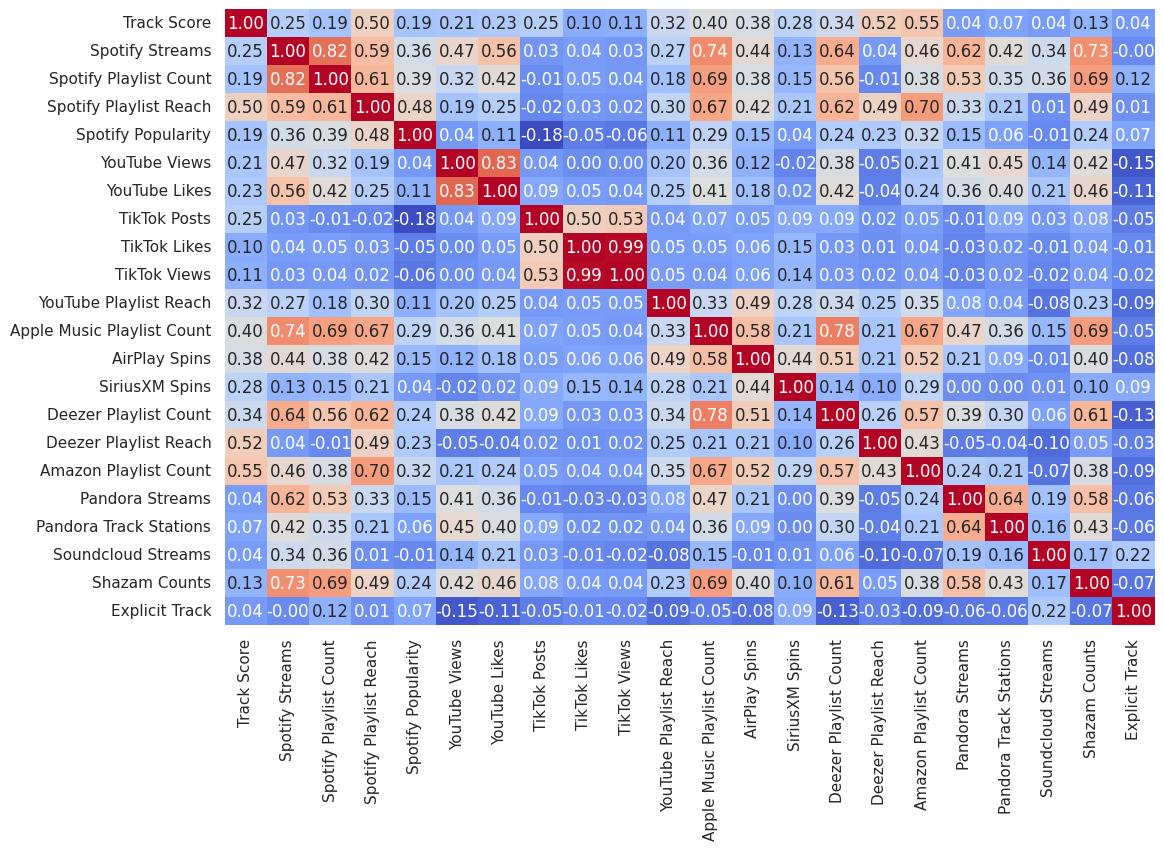

In [88]:
# Correlation between each attribute of data
correlation_matrix = most_streamed_songs.iloc[:, 6:].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

<Axes: xlabel='YouTube Views', ylabel='YouTube Likes'>

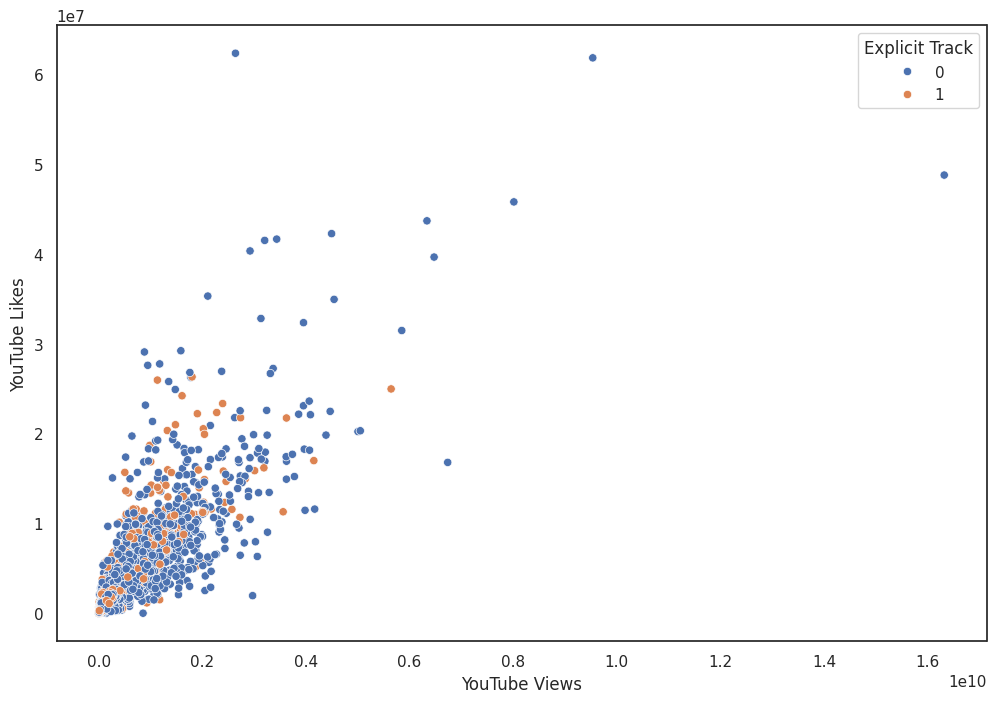

In [89]:
 sns.scatterplot(x="YouTube Views", y="YouTube Likes", data=most_streamed_songs, hue="Explicit Track")

<Axes: xlabel='TikTok Views', ylabel='TikTok Likes'>

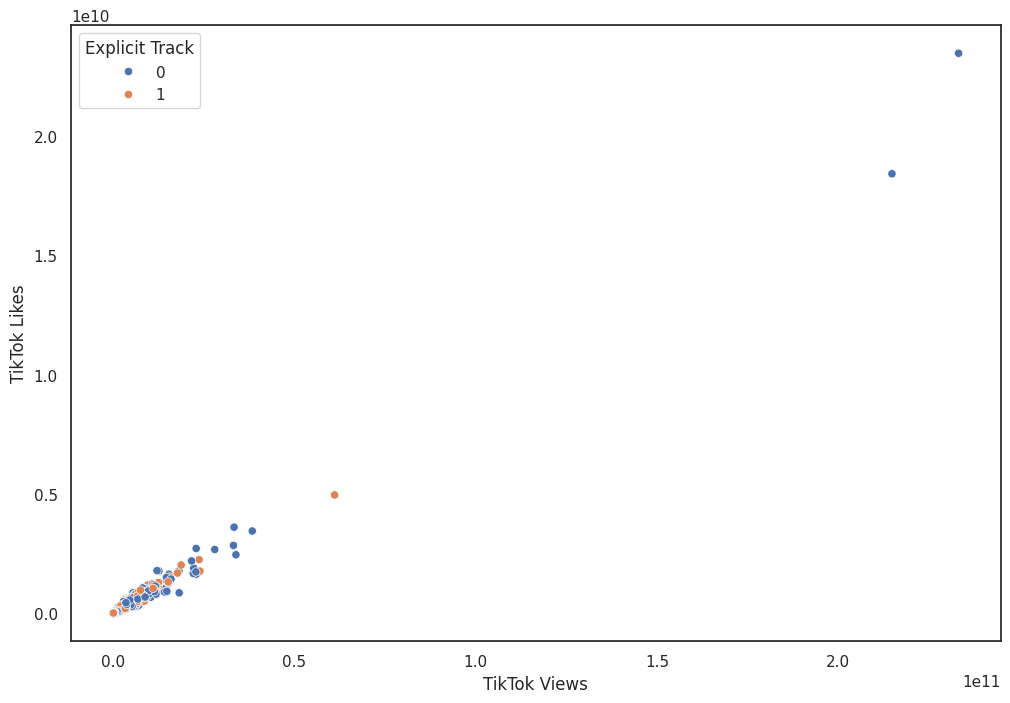

In [90]:
sns.scatterplot(x="TikTok Views", y="TikTok Likes", data=most_streamed_songs, hue="Explicit Track")

In [91]:
most_streamed_songs["Artist"].value_counts()

Artist
Drake                       63
Taylor Swift                63
Bad Bunny                   60
KAROL G                     32
The Weeknd                  31
                            ..
Carrier                      1
Javed Ali                    1
The King Khan & BBQ Show     1
Marca MP                     1
BUSHIDO ZHO                  1
Name: count, Length: 1999, dtype: int64

In [92]:
most_streamed_songs[most_streamed_songs["Artist"]=="Javed Ali"]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
1925,"Srivalli (From ""Pushpa The Rise Part - 01"")","Srivalli (From ""Pushpa The Rise Part - 01"")",Javed Ali,12/14/2021,INS182116113,"1,917",33.1,125396685.0,6443.0,2952745.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,118884.0,0


In [93]:
most_streamed_songs[most_streamed_songs["Artist"]=="The King Khan & BBQ Show"]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
1922,Love You So,The King Khan & BBQ Show,The King Khan & BBQ Show,1/1/2005,USA3D0700101,"1,918",33.1,16326628.0,12434.0,3542140.0,...,215.0,17.0,12.0,211251.0,12.0,107438.0,NaN,NaN,632600.0,0
